# Aprendizaje Estadístico 2024

## Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import k_means

from sklearn.datasets import load_iris, make_circles, make_moons, make_blobs
from skimage.data import chelsea, coffee

# K-means

In [2]:
data = load_iris()

In [3]:
X = data['data']
y = data['target']

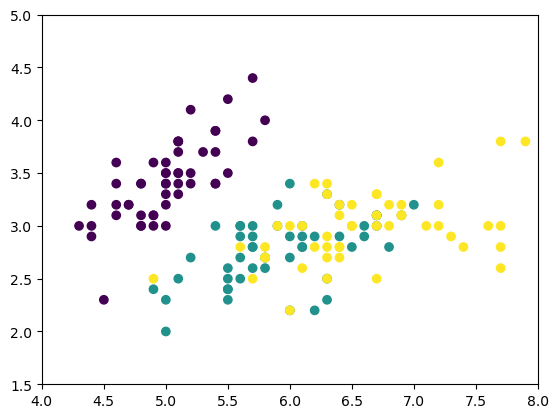

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [5]:
k = 3
centers, labels, u = k_means(X, n_clusters=k, algorithm='lloyd', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

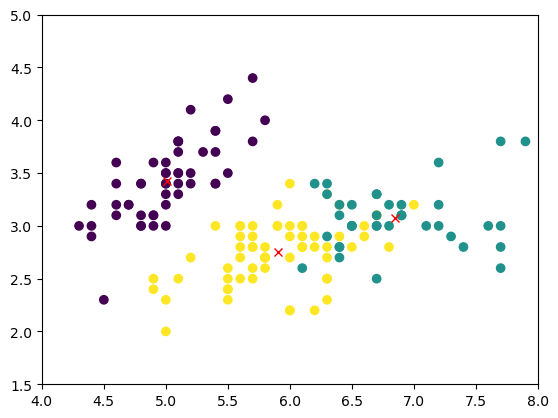

In [7]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.plot(centers[:,0], centers[:,1], 'rx')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

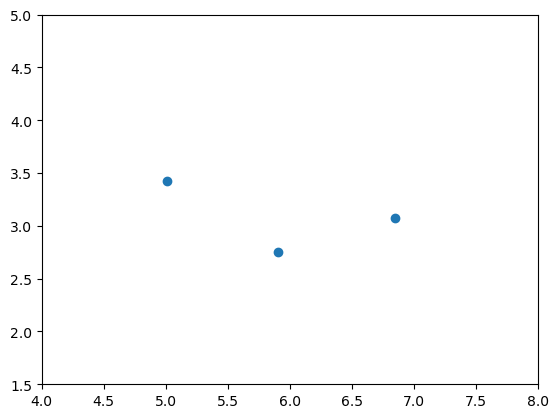

In [8]:
plt.figure()
plt.plot(centers[:,0], centers[:,1], 'o')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [9]:
labels = ((2 * np.array(labels)) % 3)
print(labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
(labels == y).sum() / len(y)

0.8933333333333333

## Image Quantization

In [11]:
I = plt.imread('playa.jpeg')
I = I[:,:,:3]

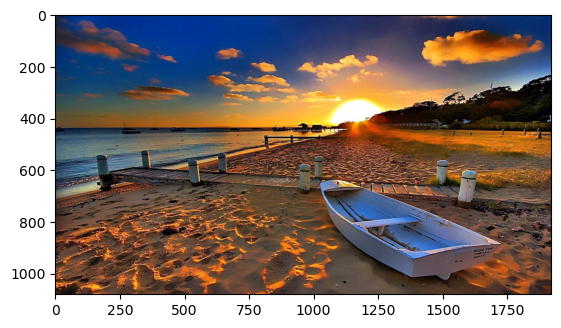

In [12]:
plt.figure()
plt.imshow(I)
plt.show()

In [13]:
sh = I.shape
sh

(1080, 1920, 3)

In [14]:
I[0,0,:]

array([ 1, 35, 63], dtype=uint8)

In [15]:
# Convert to 8bits format
#I = (255 * I).astype(np.uint8)

In [16]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [17]:
Iflat.shape

(2073600, 3)

In [18]:
Iflat[:10]

array([[ 1, 35, 63],
       [ 1, 35, 63],
       [ 1, 35, 63],
       [ 1, 34, 65],
       [ 1, 34, 65],
       [ 2, 35, 68],
       [ 2, 35, 68],
       [ 2, 35, 70],
       [ 3, 36, 71],
       [ 2, 34, 72]], dtype=uint8)

In [19]:
k = 16     # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='lloyd', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


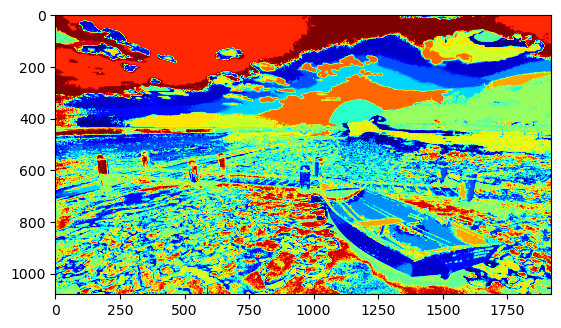

In [20]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='jet')
plt.show()

In [21]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i]

result = result.reshape(sh).astype(np.uint8)

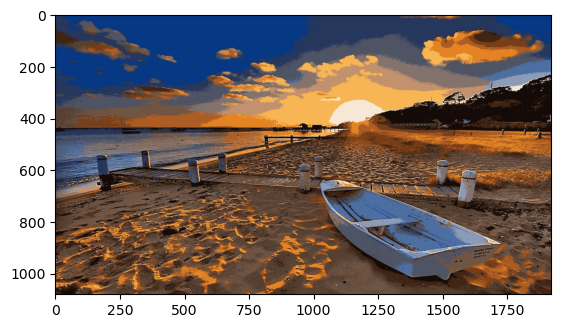

In [22]:
plt.figure()
plt.imshow(result)
plt.show()

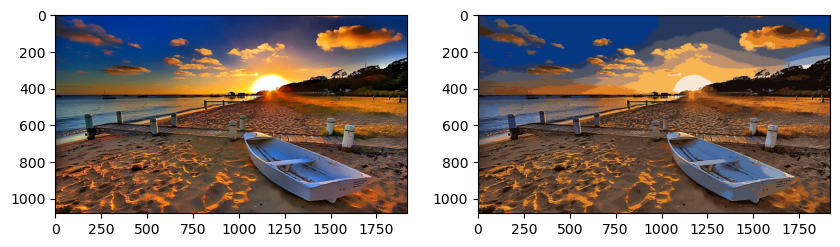

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

## Image Quantization

In [24]:
I = plt.imread('tree.jpg')

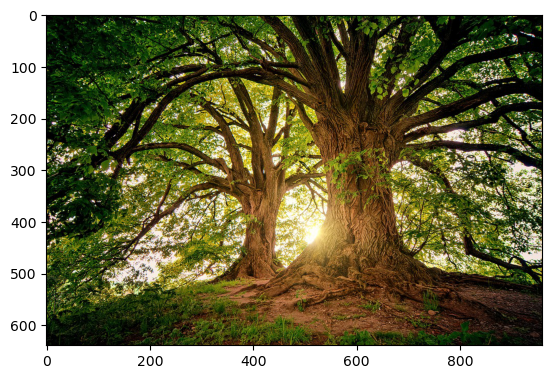

In [25]:
plt.figure()
plt.imshow(I)
plt.show()

In [26]:
sh = I.shape
sh

(639, 960, 3)

In [27]:
I[0,0,:]

array([ 3, 14,  8], dtype=uint8)

In [28]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [29]:
Iflat.shape

(613440, 3)

In [30]:
Iflat[:10]

array([[ 3, 14,  8],
       [ 3, 13,  5],
       [ 7, 15,  2],
       [ 8, 23,  2],
       [ 5, 32,  1],
       [ 3, 41,  2],
       [ 7, 49,  9],
       [20, 54, 21],
       [21, 41, 16],
       [20, 31, 15]], dtype=uint8)

In [31]:
k = 2      # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


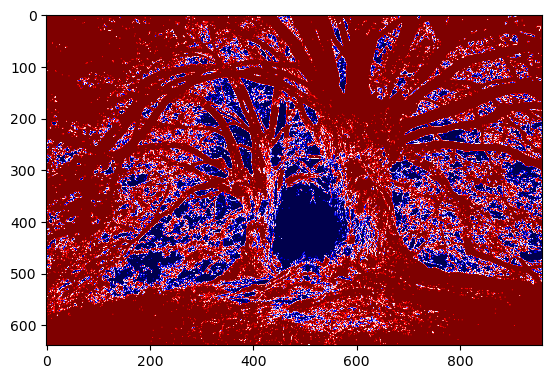

In [32]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='seismic')
plt.show()

In [33]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

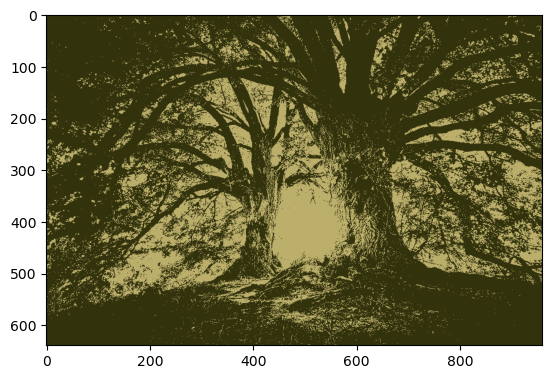

In [34]:
plt.figure()
plt.imshow(result)
plt.show()

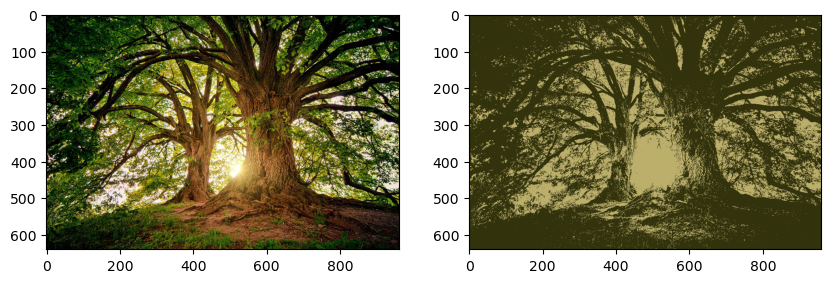

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### Otro ejemplo

In [36]:
from skimage.data import chelsea

In [37]:
I = chelsea()
#I = plt.imread('pugh.png')
#I = I[:,:,:3]

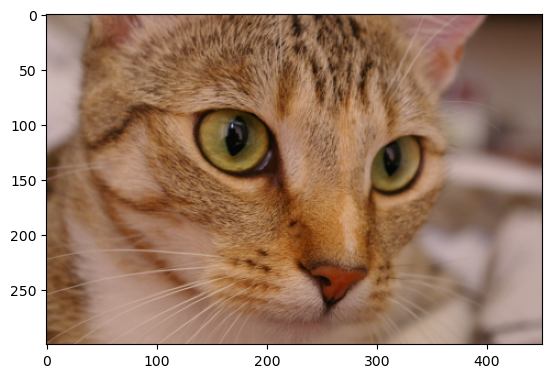

In [38]:
plt.figure()
plt.imshow(I)
plt.show()

In [39]:
sh = I.shape
sh

(300, 451, 3)

In [40]:
I[0,0,:]

array([143, 120, 104], dtype=uint8)

In [41]:
# Convert to 8bits format
#I = (255 * I).astype(np.uint8)

In [42]:
Iflat = I.reshape(-1,3)

In [43]:
k = 16
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='lloyd', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


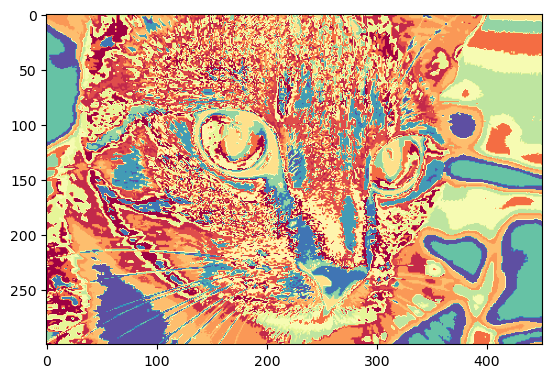

In [44]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='Spectral')
plt.show()

In [45]:
result = np.zeros(sh).reshape(-1,3)

for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

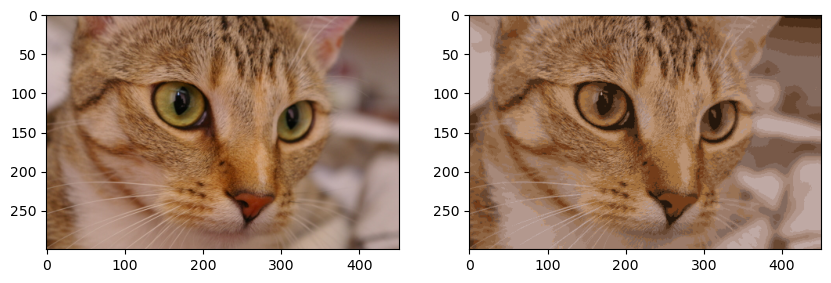

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

In [47]:
# Cambiando a Otro Espacio de Color

In [48]:
from skimage.color import rgb2hsv, rgb2lab, rgb2luv, rgb2rgbcie, rgb2xyz, rgb2ycbcr, rgb2yuv

In [49]:
J = rgb2luv(I)

In [50]:
Jflat = J.reshape(-1,3)
Jflat.shape

(135300, 3)

In [51]:
k = 16
centers2, labels2, u2 = k_means(Jflat, n_clusters=k, algorithm='auto', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


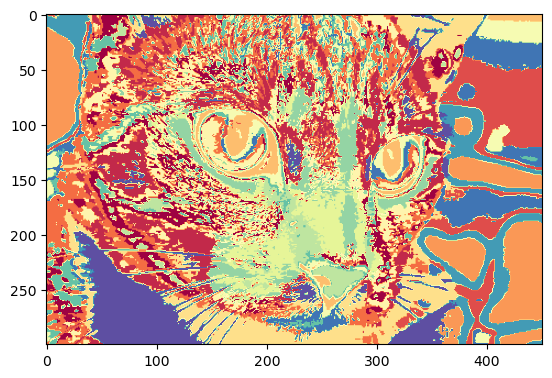

In [52]:
plt.figure()
plt.imshow(labels2.reshape(sh[0], sh[1]), cmap='Spectral')
plt.show()

In [53]:
result2 = np.zeros(sh).reshape(-1,3)

for i in range(0, k):
    result2[labels2 == i] = centers[i] 

result2 = result2.reshape(sh).astype(np.uint8)

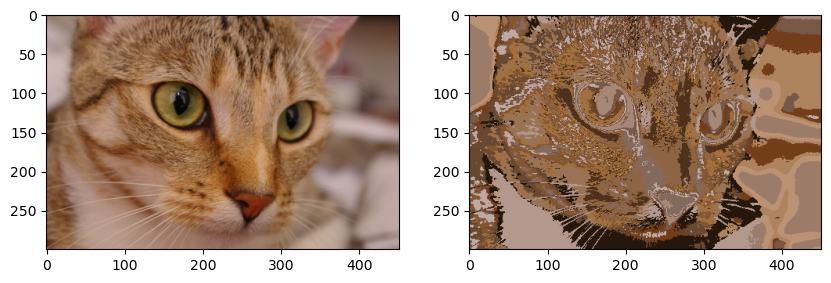

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result2)
plt.show()